In [1]:
pip install kagglehub

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# 📚 Libraries 
import kagglehub
import pandas as pd
import numpy as np
import os

# 📊 Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as g

# 🤖 Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error 

In [ ]:
nRowsRead = None # specify 'None' if want to read whole file

df1 = pd.read_csv('C:\\Users\\lquin\\Data Analytics IronHack\\Mid Project\\athlete_events.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'athlete_events.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

In [ ]:
df1.head(5)

In [ ]:
df1.shape

In [6]:
df = df1.copy()

In [7]:
df.dtypes

ID          int64
Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Games      object
Year        int64
Season     object
City       object
Sport      object
Event      object
Medal      object
dtype: object

In [79]:
#Drop Data
df.drop(columns=['Height', 'Games','Weight'], inplace=True)
df.head(3)

KeyError: "['Height', 'Games', 'Weight'] not found in axis"

In [9]:
df.set_index("ID", inplace=True)

In [10]:
df.columns

Index(['Name', 'Sex', 'Age', 'Team', 'NOC', 'Year', 'Season', 'City', 'Sport',
       'Event', 'Medal'],
      dtype='object')

In [11]:
df.isnull().sum()

Name           0
Sex            0
Age         9474
Team           0
NOC            0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,261642.0,25.556898,6.393561,10.0,21.0,24.0,28.0,97.0
Year,271116.0,1978.378480,29.877632,1896.0,1960.0,1988.0,2002.0,2016.0


In [13]:
df.shape

(271116, 11)

In [25]:
def check_distributions_age_year(df):
    sns.set(style="whitegrid")
    
    for column in ['Age', 'Year']:
        plt.figure(figsize=(10, 5))
        sns.histplot(df[column], kde=True, bins=30, color='blue')
        plt.title(f'Distribution of {column}', fontsize=14)
        plt.xlabel(column, fontsize=12)
        plt.ylabel('Frequency', fontsize=12)
        plt.tight_layout()
        plt.show()

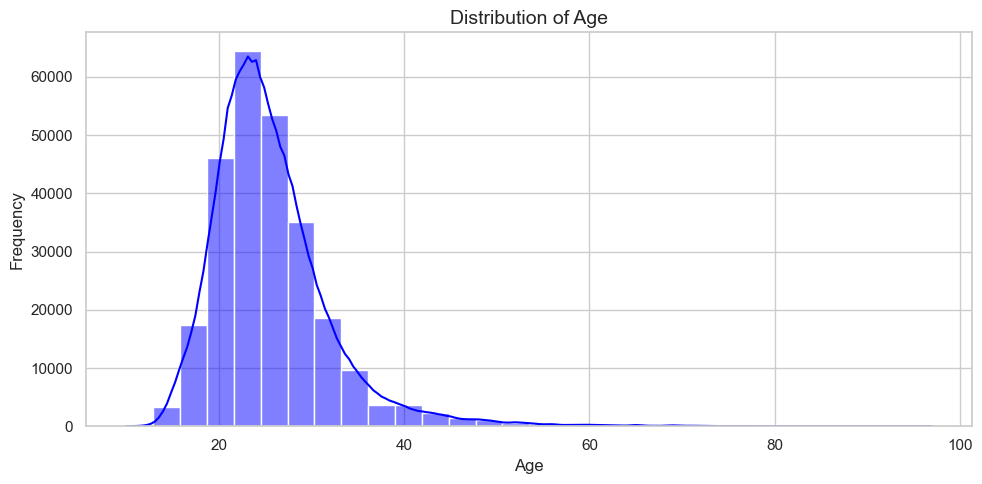

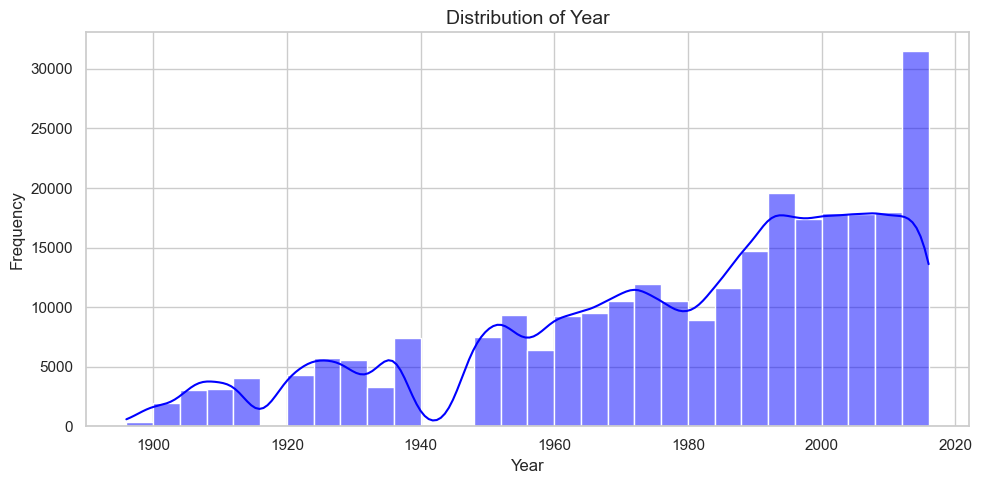

In [26]:
check_distributions_age_year(df)

In [28]:
#Gold Analysis

In [33]:
df2 = df.copy()

In [51]:
gold_medals = df2[df2['Medal'] == 'Gold']

In [52]:
gold_medals

,Name,Sex,Age,Team,NOC,Year,Season,City,Sport,Event,Medal
ID,,,,,,,,,,,
4,Edgar Lindenau Aabye,M,34.0,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
17,Paavo Johannes Aaltonen,M,28.0,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold
17,Paavo Johannes Aaltonen,M,28.0,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold
17,Paavo Johannes Aaltonen,M,28.0,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold
20,Kjetil Andr Aamodt,M,20.0,Norway,NOR,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold
...,...,...,...,...,...,...,...,...,...,...,...
135503,Zurab Zviadauri,M,23.0,Georgia,GEO,2004,Summer,Athina,Judo,Judo Men's Middleweight,Gold
135520,Julia Zwehl,F,28.0,Germany,GER,2004,Summer,Athina,Hockey,Hockey Women's Hockey,Gold
135523,"Ronald Ferdinand ""Ron"" Zwerver",M,29.0,Netherlands,NED,1996,Summer,Atlanta,Volleyball,Volleyball Men's Volleyball,Gold


In [53]:
winners_counts = gold_medals['Team'].value_counts()

# Display the counts
print(winners_counts)

Team
United States    2474
Soviet Union     1058
Germany           679
Italy             535
Great Britain     519
                 ... 
Israel              1
Carabinier-15       1
Mozambique          1
Belgium-1           1
Satchmo             1
Name: count, Length: 242, dtype: int64


In [61]:
age_winners_counts = gold_medals['Age'].value_counts()

# Display the counts
print(age_winners_counts)

Age
23.0    1136
24.0    1135
22.0    1096
25.0    1056
26.0     976
21.0     925
27.0     863
28.0     802
20.0     674
29.0     649
30.0     527
19.0     459
31.0     401
32.0     357
33.0     292
18.0     280
34.0     218
17.0     199
35.0     176
36.0     133
16.0     116
38.0      89
37.0      81
15.0      75
40.0      74
39.0      65
41.0      43
42.0      42
44.0      38
43.0      32
14.0      27
46.0      24
47.0      24
48.0      21
45.0      20
49.0      15
54.0      15
52.0      12
50.0      12
56.0      10
13.0       7
53.0       6
63.0       4
51.0       4
60.0       4
58.0       3
57.0       2
59.0       2
64.0       2
55.0       1
Name: count, dtype: int64


In [42]:
#Silver Analysis

In [54]:
df3 = df.copy()

In [55]:
silver_medals = df3[df3['Medal'] == 'Silver']

In [56]:
silver_medals

,Name,Sex,Age,Team,NOC,Year,Season,City,Sport,Event,Medal
ID,,,,,,,,,,,
20,Kjetil Andr Aamodt,M,22.0,Norway,NOR,1994,Winter,Lillehammer,Alpine Skiing,Alpine Skiing Men's Downhill,Silver
20,Kjetil Andr Aamodt,M,22.0,Norway,NOR,1994,Winter,Lillehammer,Alpine Skiing,Alpine Skiing Men's Combined,Silver
25,Alf Lied Aanning,M,24.0,Norway,NOR,1920,Summer,Antwerpen,Gymnastics,"Gymnastics Men's Team All-Around, Free System",Silver
30,Pepijn Aardewijn,M,26.0,Netherlands,NED,1996,Summer,Atlanta,Rowing,Rowing Men's Lightweight Double Sculls,Silver
38,Karl Jan Aas,M,20.0,Norway,NOR,1920,Summer,Antwerpen,Gymnastics,"Gymnastics Men's Team All-Around, Free System",Silver
...,...,...,...,...,...,...,...,...,...,...,...
135522,"Klaas Erik ""Klaas-Erik"" Zwering",M,23.0,Netherlands,NED,2004,Summer,Athina,Swimming,Swimming Men's 4 x 100 metres Freestyle Relay,Silver
135523,"Ronald Ferdinand ""Ron"" Zwerver",M,25.0,Netherlands,NED,1992,Summer,Barcelona,Volleyball,Volleyball Men's Volleyball,Silver
135544,Krzysztof Zwoliski,M,21.0,Poland,POL,1980,Summer,Moskva,Athletics,Athletics Men's 4 x 100 metres Relay,Silver


In [57]:
silver_counts = silver_medals['Team'].value_counts()

# Display the counts
print(silver_counts)

Team
United States    1512
Soviet Union      716
Germany           627
Great Britain     582
France            518
                 ... 
Israel              1
Bahrain             1
Cyprus              1
Rostock             1
Tonga               1
Name: count, Length: 273, dtype: int64


In [62]:
age_silver_counts = silver_medals['Age'].value_counts()

# Display the counts
print(age_silver_counts)

Age
23.0    1143
24.0    1048
25.0    1023
22.0     982
26.0     947
27.0     937
21.0     860
28.0     786
20.0     638
29.0     588
30.0     549
19.0     441
31.0     425
32.0     347
18.0     294
33.0     264
34.0     205
17.0     163
35.0     156
36.0     135
16.0     129
37.0      93
38.0      81
15.0      67
40.0      66
39.0      61
41.0      51
44.0      45
42.0      38
43.0      32
14.0      30
46.0      28
45.0      27
48.0      15
49.0      15
47.0      14
50.0      13
53.0       8
52.0       8
55.0       8
51.0       7
13.0       7
54.0       7
56.0       6
58.0       6
60.0       6
61.0       4
12.0       3
59.0       3
66.0       2
68.0       2
63.0       2
57.0       1
71.0       1
11.0       1
73.0       1
72.0       1
69.0       1
Name: count, dtype: int64


In [ ]:
#Bronze Analysis

In [50]:
df4 = df.copy()

In [58]:
bronze_medals = df4[df4['Medal'] == 'Bronze']

In [59]:
bronze_medals

,Name,Sex,Age,Team,NOC,Year,Season,City,Sport,Event,Medal
ID,,,,,,,,,,,
15,Arvo Ossian Aaltonen,M,30.0,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
15,Arvo Ossian Aaltonen,M,30.0,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
16,Juhamatti Tapio Aaltonen,M,28.0,Finland,FIN,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
17,Paavo Johannes Aaltonen,M,28.0,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
17,Paavo Johannes Aaltonen,M,32.0,Finland,FIN,1952,Summer,Helsinki,Gymnastics,Gymnastics Men's Team All-Around,Bronze
...,...,...,...,...,...,...,...,...,...,...,...
135535,Claudia Antoinette Zwiers,F,22.0,Netherlands,NED,1996,Summer,Atlanta,Judo,Judo Women's Middleweight,Bronze
135545,Henk Jan Zwolle,M,27.0,Netherlands,NED,1992,Summer,Barcelona,Rowing,Rowing Men's Double Sculls,Bronze
135553,Galina Ivanovna Zybina (-Fyodorova),F,33.0,Soviet Union,URS,1964,Summer,Tokyo,Athletics,Athletics Women's Shot Put,Bronze


In [60]:
bronze_counts = bronze_medals['Team'].value_counts()

# Display the counts
print(bronze_counts)

Team
United States    1233
Germany           678
Soviet Union      677
France            577
Great Britain     572
                 ... 
Zambia              1
Macedonia           1
Cameroon            1
Suriname            1
Digby               1
Name: count, Length: 268, dtype: int64


In [63]:
age_bronze_counts = bronze_medals['Age'].value_counts()

# Display the counts
print(age_bronze_counts)

Age
23.0    1116
24.0    1106
22.0    1081
25.0    1045
26.0    1001
21.0     899
27.0     890
28.0     747
29.0     704
20.0     692
30.0     523
19.0     469
31.0     424
32.0     307
18.0     286
33.0     236
34.0     217
17.0     172
35.0     153
36.0     115
16.0     105
37.0     103
38.0      75
40.0      63
39.0      62
15.0      54
41.0      47
42.0      41
43.0      37
44.0      34
45.0      28
46.0      26
49.0      19
14.0      18
47.0      17
48.0      16
52.0      15
51.0      11
50.0       8
55.0       5
53.0       5
57.0       4
54.0       4
56.0       4
63.0       3
58.0       3
12.0       3
61.0       2
13.0       2
60.0       2
72.0       1
59.0       1
69.0       1
10.0       1
71.0       1
65.0       1
64.0       1
Name: count, dtype: int64


In [67]:
#T-TEST

In [ ]:
#4. T-test for differences in Age of athletes who won Gold vs other medals
#Hypothesis: Gold medalists have a different average age compared to athletes with Silver or Bronze medals.
#Grouping Variable: Medal (Gold vs. others)
#Numerical Variable: Age

In [65]:
from scipy.stats import ttest_ind

In [66]:
gold_age = df[df['Medal'] == 'Gold']['Age'].dropna()
other_medals_age = df[df['Medal'].isin(['Silver', 'Bronze'])]['Age'].dropna()

t_stat, p_value = ttest_ind(gold_age, other_medals_age, equal_var=False)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: -0.5787034552853947, P-value: 0.5627941508964953


In [ ]:
#Conclusion:
#Fail to Reject the Null Hypothesis: There is no statistically significant difference in the mean age between male and female athletes based on this dataset.
#Practical Implication: The data does not provide strong evidence to suggest that the average age of male and female athletes is different.This can be reflected in the wide variety of sports presetnd

In [ ]:
idade media por medalha ao longo dos anos

idade media por ano e guardar, em dicionario. Key value ano ,idade media.

In [ ]:
ciclo em years unic , 

In [71]:
bronze_medals_dict = dict()
for year in bronze_medals.Year.unique():
    df_year = bronze_medals[bronze_medals.Year == year]
    avg_age = df_year.Age.sum()/len(df_year)
    bronze_medals_dict[year] = avg_age

In [72]:
bronze_medals_dict

{1920: 25.348773841961854,
 2014: 26.63131313131313,
 1948: 27.975384615384616,
 1952: 26.844380403458214,
 1992: 24.835211267605633,
 1994: 24.919642857142858,
 1988: 24.692307692307693,
 1996: 25.19236883942766,
 2016: 26.083926031294453,
 2008: 25.909859154929578,
 1984: 24.29340277777778,
 1936: 26.01818181818182,
 1906: 15.427586206896551,
 2012: 26.119293078055964,
 1912: 26.91,
 1956: 25.32471264367816,
 1972: 24.85979381443299,
 1980: 24.346863468634687,
 2004: 26.221565731166912,
 2006: 27.748571428571427,
 1964: 25.059850374064837,
 1968: 25.16627078384798,
 1908: 25.21484375,
 2000: 26.195588235294117,
 2002: 26.67924528301887,
 1976: 24.58108108108108,
 1932: 25.54310344827586,
 1960: 25.19327731092437,
 1900: 21.422857142857143,
 1924: 24.344051446945336,
 1904: 22.2,
 1998: 26.206666666666667,
 1928: 25.476868327402133,
 2010: 26.730994152046783,
 1896: 11.947368421052632}

In [74]:
silver_medals_dict = dict()
for year in silver_medals.Year.unique():
    df_year = silver_medals[silver_medals.Year == year]
    avg_age = df_year.Age.sum()/len(df_year)
    silver_medals_dict[year] = avg_age

In [75]:
silver_medals_dict

{1994: 25.458715596330276,
 1920: 26.524553571428573,
 1996: 25.50578512396694,
 2008: 26.332833583208394,
 2016: 26.39083969465649,
 2004: 26.277272727272727,
 1992: 24.729071537290714,
 1964: 25.467980295566502,
 1924: 27.956112852664578,
 1972: 24.604395604395606,
 1912: 27.68888888888889,
 2012: 26.074603174603176,
 1928: 25.51685393258427,
 1984: 24.159709618874775,
 2002: 27.388535031847134,
 2006: 26.822857142857142,
 1976: 24.44950495049505,
 1904: 22.12883435582822,
 1980: 24.354048964218457,
 1960: 25.14327485380117,
 1988: 24.459234608985025,
 2010: 26.65142857142857,
 1948: 27.84036144578313,
 1932: 26.134146341463413,
 1956: 24.771929824561404,
 2000: 26.02874432677761,
 1936: 26.034582132564843,
 1952: 27.04776119402985,
 1998: 26.020689655172415,
 1900: 19.79824561403509,
 1908: 23.715302491103202,
 2014: 26.558375634517766,
 1968: 24.931707317073172,
 1906: 17.07051282051282,
 1896: 16.11627906976744}

In [76]:
gold_medals_dict = dict()
for year in gold_medals.Year.unique():
    df_year = gold_medals[gold_medals.Year == year]
    avg_age = df_year.Age.sum()/len(df_year)
    gold_medals_dict[year] = avg_age

In [77]:
gold_medals_dict

{1900: 25.09452736318408,
 1948: 27.2,
 1992: 24.429864253393664,
 2002: 26.82716049382716,
 2006: 27.443181818181817,
 2008: 25.907600596125185,
 1960: 24.685236768802227,
 1912: 27.288343558282207,
 1956: 26.099150141643058,
 2012: 26.001582278481013,
 2000: 26.104072398190045,
 1996: 25.61019736842105,
 1980: 24.2117202268431,
 1988: 24.337726523887973,
 1984: 24.267950963222418,
 1972: 25.09282700421941,
 1994: 25.37272727272727,
 1952: 26.384615384615383,
 1904: 24.508670520231213,
 1932: 25.95402298850575,
 1924: 26.753012048192772,
 2004: 25.97289156626506,
 2016: 26.51578947368421,
 1920: 27.920892494929006,
 1976: 24.125984251968504,
 1936: 25.833333333333332,
 2010: 26.78735632183908,
 2014: 26.742574257425744,
 1964: 25.07598039215686,
 1928: 25.701818181818183,
 1906: 21.452229299363058,
 1908: 27.5578231292517,
 1968: 24.701176470588237,
 1998: 25.917241379310344,
 1896: 19.322580645161292}

In [80]:
df.head(5)

,Name,Sex,Age,Team,NOC,Year,Season,City,Sport,Event,Medal
ID,,,,,,,,,,,
1,A Dijiang,M,24.0,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
2,A Lamusi,M,23.0,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
3,Gunnar Nielsen Aaby,M,24.0,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
4,Edgar Lindenau Aabye,M,34.0,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
5,Christine Jacoba Aaftink,F,21.0,Netherlands,NED,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [83]:
gold_medals_dict = dict()

for year in sorted(gold_medals.Year.unique()):
    df_year = gold_medals[gold_medals.Year == year]
    avg_age = df_year.Age.sum() / len(df_year)
    gold_medals_dict[year] = avg_age

# Printing the years and average ages in ascending order
for year, avg_age in sorted(gold_medals_dict.items()):
    print(f"{year}: {avg_age:.2f}")


1896: 19.32
1900: 25.09
1904: 24.51
1906: 21.45
1908: 27.56
1912: 27.29
1920: 27.92
1924: 26.75
1928: 25.70
1932: 25.95
1936: 25.83
1948: 27.20
1952: 26.38
1956: 26.10
1960: 24.69
1964: 25.08
1968: 24.70
1972: 25.09
1976: 24.13
1980: 24.21
1984: 24.27
1988: 24.34
1992: 24.43
1994: 25.37
1996: 25.61
1998: 25.92
2000: 26.10
2002: 26.83
2004: 25.97
2006: 27.44
2008: 25.91
2010: 26.79
2012: 26.00
2014: 26.74
2016: 26.52
